In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Fraud.csv' )

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.shape

(6362620, 11)

In [ ]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
df = my_data.dropna()
#here the no of missing values is very small as comparing to  the alrge data set its better to drop them
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
df['isFraud'].value_counts()

,count
isFraud,
0.0,654646
1.0,398


In [ ]:
df["amount"].describe().astype(int)

,amount
count,655044
mean,162666
std,271555
min,0
25%,12535
50%,76849
75%,216780
max,10000000


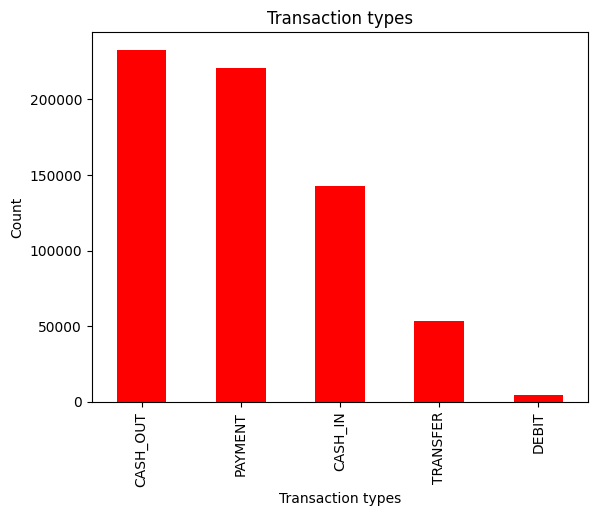

In [ ]:
df['type'].value_counts().plot(kind="bar",title="Transaction types", color = "red")
plt.xlabel ("Transaction types")
plt.ylabel ("Count")
plt.show()

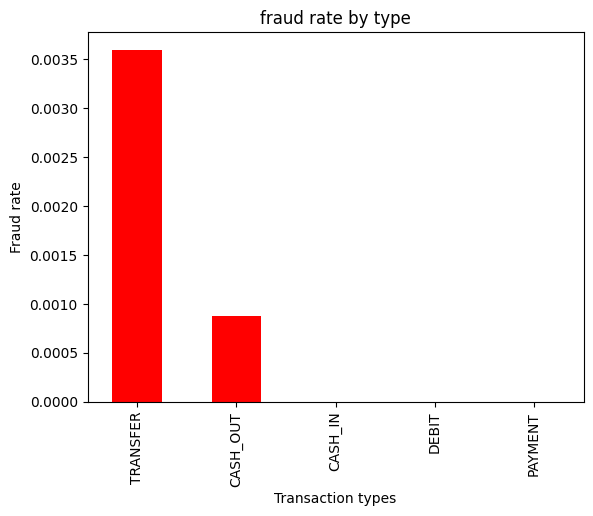

In [ ]:
fraud_by_type = df.groupby('type')['isFraud'].mean().sort_values(ascending=False)
fraud_by_type.plot(kind="bar", title="fraud rate by type", color = "red")
plt.xlabel ("Transaction types")
plt.ylabel ("Fraud rate")
plt.show()

In [ ]:
frauds_per_step = df[df["isFraud"]== 1] ["step"].value_counts().sort_index()

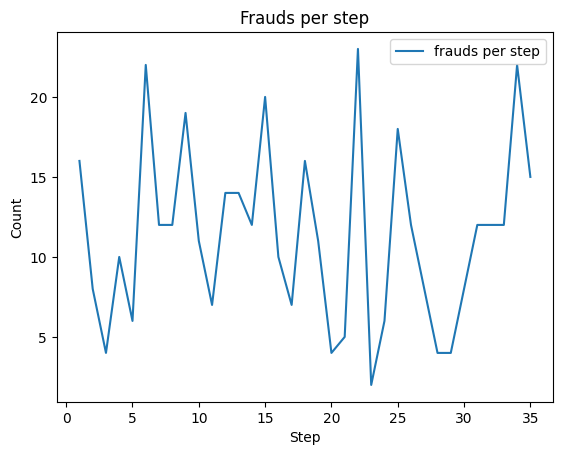

In [ ]:
plt.plot(frauds_per_step.index , frauds_per_step.values, label="frauds per step")
plt.title("Frauds per step")
plt.xlabel("Step")
plt.ylabel("Count")
plt.legend()
plt.show()

In [ ]:
fraud_users = df[df["isFraud"]==1]["nameOrig"].value_counts().head(10)

In [ ]:
fraud_users

,count
nameOrig,
C1036592129,1
C1305486145,1
C840083671,1
C1420196421,1
C2101527076,1
C137533655,1
C1118430673,1
C749981943,1
C1334405552,1


In [ ]:
df_my = df.drop(["nameOrig","nameDest","isFlaggedFraud"], axis=1)


In [ ]:
categorial= ["type"]
numeric = ["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]

In [ ]:
X = df_my.drop(["isFraud"], axis=1)
Y = df_my["isFraud"]


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

In [ ]:


print(X.shape, X_train.shape, X_test.shape)

(655044, 7) (458530, 7) (196514, 7)


In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric),
        ("cat", OneHotEncoder(drop="first"), categorial),
    ],
    remainder="drop",
)


In [ ]:
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(class_weight="balanced", max_iter=1000))
]
)

In [ ]:
pipeline.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [ ]:
X_train_prediction = pipeline.predict(X_train)
training_test_accuracy = accuracy_score(Y_train, X_train_prediction)

In [ ]:
print('Accuracy on training data = ', training_test_accuracy)

Accuracy on training data =  0.9153032516956361


In [ ]:
# accuracy on test data
X_test_prediction = pipeline.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy on test data = ', test_data_accuracy)

Accuracy on test data =  0.9139145302624749


In [ ]:
# Example input: type, amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest
input_data = ('CASH_OUT', 181.00, 181.0, 0.00, 21182.0, 0.0)

input_data_df = pd.DataFrame([input_data], columns=['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'])

# Now predict
prediction = pipeline.predict(input_data_df)

print(prediction)

if prediction[0] == 0:
    print('not a fraud transaction')
else:
    print('fraud transaction')


[1.]
fraud transaction


In [160]:
# import joblib
# joblib.dump(pipeline, 'fraud_detection_model.pkl')

['fraud_detection_model.pkl']